In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv('/content/drive/MyDrive/agedepth.txt', delimiter =' ', header=None)
datos.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1
0,6.171,55.812
1,18.844,124.204
2,17.765,125.890
3,17.206,117.404
4,13.060,87.779


Forward Modeling

In [ ]:
@tf.function
def FM_sed(w, x):
    return tf.tensordot(tf.cast(w, tf.float64), tf.stack([tf.cast(x, tf.float64), tf.ones_like(x, dtype=tf.float64)], axis=0), axes=1)

Optimizador

In [ ]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.2)

Variable de entrenamiento

In [ ]:
SD = tf.Module()
SD.w = tf.Variable([1., 1.])

In [ ]:
def train():
  with tf.GradientTape() as tape:
    datos_pred = FM_sed(SD.w, datos.iloc[:, 0])
    J = (0.5)*tf.norm(tf.math.log(datos_pred) - tf.math.log(datos.iloc[:, 1]), 2)
    grads = tape.gradient(J, SD.trainable_variables)
    optimizer.apply_gradients(zip(grads, SD.trainable_variables))
    return J

In [ ]:
from tqdm import trange
loss_i = []
niter = trange(1000)
for i in niter:
  loss = train()
  niter.set_postfix(LOSS=loss.numpy())
  loss_i.append(loss.numpy())

100%|██████████| 1000/1000 [00:39<00:00, 25.37it/s, LOSS=0.534]


LOSS: 0.5341282753944809


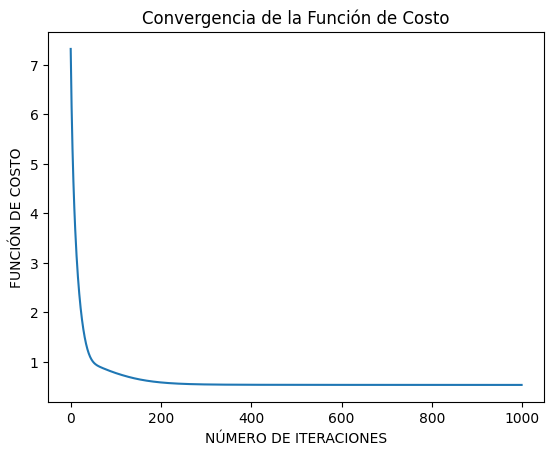

In [ ]:
plt.plot(loss_i)
plt.title('Convergencia de la Función de Costo')
plt.ylabel('FUNCIÓN DE COSTO')
plt.xlabel('NÚMERO DE ITERACIONES')
print(f'LOSS: {loss}')

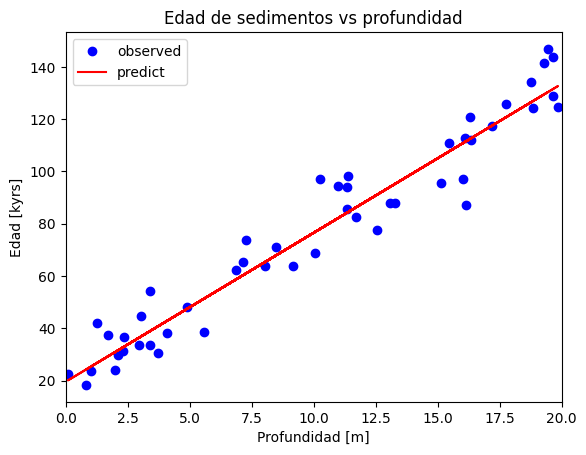

In [ ]:
plt.plot(datos.iloc[:, 0], datos.iloc[:, 1], 'bo', label='observed')
plt.plot(datos.iloc[:, 0], FM_sed(SD.w, datos.iloc[:, 0]), linestyle='solid', label = 'predict', color = 'red')
plt.xlabel('Profundidad [m]')
plt.ylabel('Edad [kyrs]')
plt.xlim (0,20)
plt.title('Edad de sedimentos vs profundidad')
plt.savefig('/content/edades_sed.svg', format='svg', transparent=True)
plt.legend()

In [ ]:
from google.colab import files
files.download('/content/edades_sed.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(SD.w.numpy())

[ 5.6957583 19.590097 ]


Del vector **[5.6957583, 19.590097]** el valor ***5.6957583 [kyrs/m]*** representa la tasa de acumulación del sedimento en kyrs por metro (pendiente) y el valor ***19.590097 [kyrs]*** representa la edad del sedimento en la superficie del sedimento-agua interfaz (intercepto).
